# 2. Data load

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
weather_data_csv = pd.read_csv('./weatherHistory.csv')

In [32]:
weather_data_csv.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [33]:
weather_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [34]:
weather_data_csv.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# 3. Preprocessing

In [35]:
# Data Drop - 'Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'
weather_data = weather_data_csv.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis = 1)

# Column rearrange
cols = list(weather_data.columns.values)
cols.append(cols.pop(1))
weather_data = weather_data[cols]
weather_data.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778


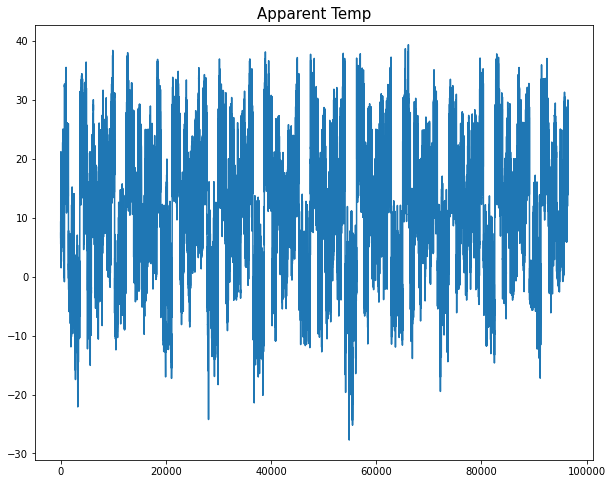

In [36]:
x_axis = np.arange(0, len(weather_data['Apparent Temperature (C)']), 1)

plt.figure(figsize = (10, 8))
plt.title("Apparent Temp", fontsize = 15)
plt.plot(x_axis, weather_data['Apparent Temperature (C)'])

In [43]:
# Data sort
weather_data = weather_data.sort_values(by = 'Apparent Temperature (C)', axis = 0)
weather_data

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
54864,-20.000000,0.78,11.2700,20.0,0.0000,1033.30,-27.716667
54845,-20.000000,0.82,8.0500,340.0,1.4490,1032.60,-26.227778
54866,-20.555556,0.78,6.4400,30.0,1.4490,1032.10,-25.922222
55489,-20.050000,0.78,6.2146,170.0,1.7066,1034.74,-25.200000
55492,-20.277778,0.79,5.6672,158.0,1.8032,1033.53,-25.072222
...,...,...,...,...,...,...,...
65534,37.072222,0.31,15.1501,205.0,10.3523,1012.63,38.255556
9903,36.972222,0.32,10.5294,224.0,9.9820,1018.76,38.377778
65535,37.872222,0.27,15.7136,212.0,9.9820,1011.88,38.416667
65533,37.266667,0.32,13.7494,175.0,9.9820,1013.15,38.661111


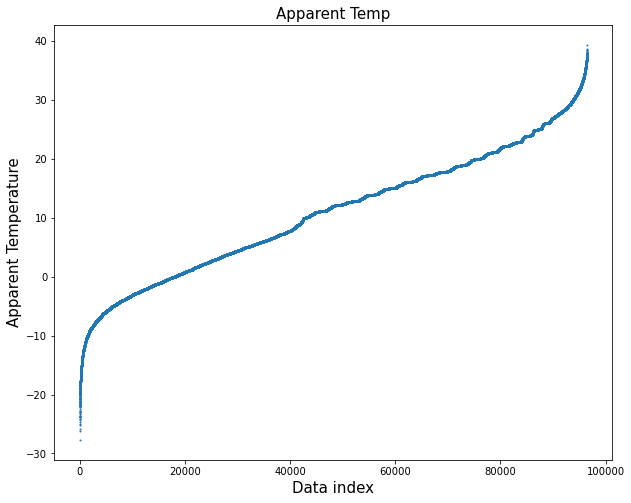

In [44]:
plt.figure(figsize = (10, 8))
plt.title("Apparent Temp", fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Apparent Temperature', fontsize = 15)
plt.plot(x_axis, weather_data['Apparent Temperature (C)'], 'o', markersize = 1)

In [95]:
inout_data = weather_data.to_numpy()
inout_data.shape

(96453, 7)

In [96]:
input_data = inout_data[:, :-1]
output_data = inout_data[:, -1].reshape([-1, 1])

input_data.shape, output_data.shape

((96453, 6), (96453, 1))

In [97]:
(input_data[:,0]**0).shape, input_data.shape

((96453,), (96453, 6))

In [98]:
np.hstack([output_data**0, input_data]).shape

(96453, 7)

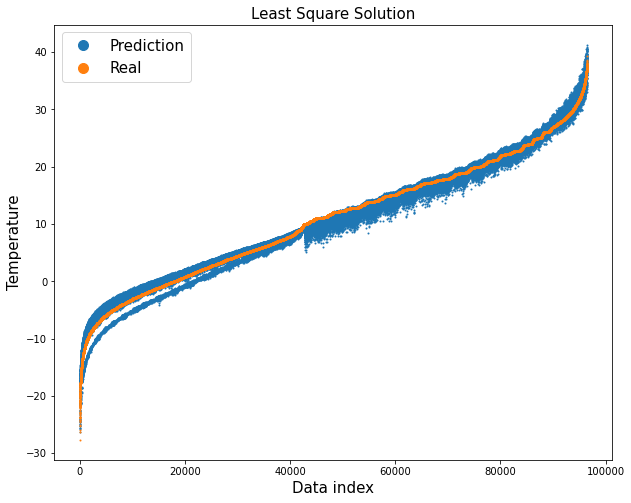

In [101]:
input_data_matrix = np.asmatrix(np.hstack([output_data**0, input_data]))
# input_data_matrix = np.asmatrix(input_data)

theta = (input_data_matrix.T * input_data_matrix).I * input_data_matrix.T * output_data
y_hat = input_data_matrix * theta

plt.figure(figsize = (10, 8))
plt.title('Least Square Solution', fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(y_hat, 'o', markersize = 1, label = 'Prediction')
plt.plot(output_data, 'o', markersize = 1, label = 'Real')
plt.legend(fontsize = 15, markerscale=10)
plt.show()


In [102]:
input_data_matrix = np.asmatrix(input_data)

theta = np.random.randn(6, 1)
theta = np.asmatrix(theta)

print("initial theta : ", theta.reshape([1, -1]))

# step size
alpha_init = 0.00000000001

for i in range(200000):

    if i < 10000:
        alpha = alpha_init - alpha_init * 0.00001 * i # learning rate decay
    
    df = 2 * (input_data_matrix.T * input_data_matrix * theta - input_data_matrix.T * output_data)
    theta -= alpha * df 
    
    if i%10000 == 0:
        print(f"#{i}: {theta.reshape([1, -1])}")
    
print("fitted theta : ", theta.reshape([1, -1]))

initial theta :  [[ 0.38201889 -0.3495021   0.13300501  0.16399197  0.61447721  0.43867882]]
#0: [[ 0.37125613 -0.35017258  0.12314473 -0.01029872  0.60502203 -0.48651242]]
#10000: [[ 0.88395434 -0.35632274 -0.02650951 -0.00109514  0.52634564 -0.00432388]]
#20000: [[ 9.94388514e-01 -3.56923203e-01 -9.18783124e-02 -6.65507424e-04
   4.15943913e-01 -3.87893506e-03]]
#30000: [[ 1.03176158e+00 -3.56865057e-01 -1.16424731e-01 -2.93114608e-04
   3.22182190e-01 -3.16914435e-03]]
#40000: [[ 1.05124114e+00 -3.56694137e-01 -1.23606711e-01 -6.08948165e-05
   2.48177508e-01 -2.60927148e-03]]
#50000: [[ 1.06438856e+00 -3.56500312e-01 -1.23987521e-01  8.17075992e-05
   1.90509403e-01 -2.19738099e-03]]
#60000: [[ 1.07416148e+00 -3.56296653e-01 -1.22039060e-01  1.74014886e-04
   1.45617227e-01 -1.89169682e-03]]
#70000: [[ 1.08165435e+00 -3.56085097e-01 -1.19558954e-01  2.37509488e-04
   1.10640439e-01 -1.66078036e-03]]
#80000: [[ 1.08745955e+00 -3.55866614e-01 -1.17214340e-01  2.83341484e-04
   8.3366

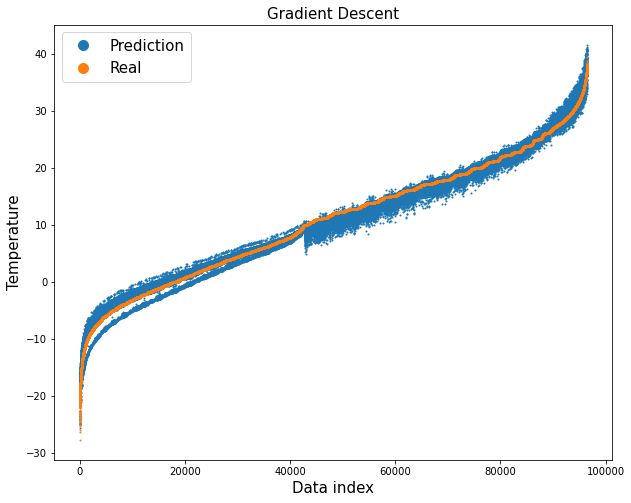

In [103]:
y_hat = input_data * theta

plt.figure(figsize = (10, 8))
plt.title('Gradient Descent', fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(y_hat, 'o', markersize = 1, label = 'Prediction')
plt.plot(output_data, 'o', markersize = 1, label = 'Real')
plt.legend(fontsize = 15, markerscale=10)
plt.show()

<ipython-input-105-fa44e4c291ff>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(reg_coef)


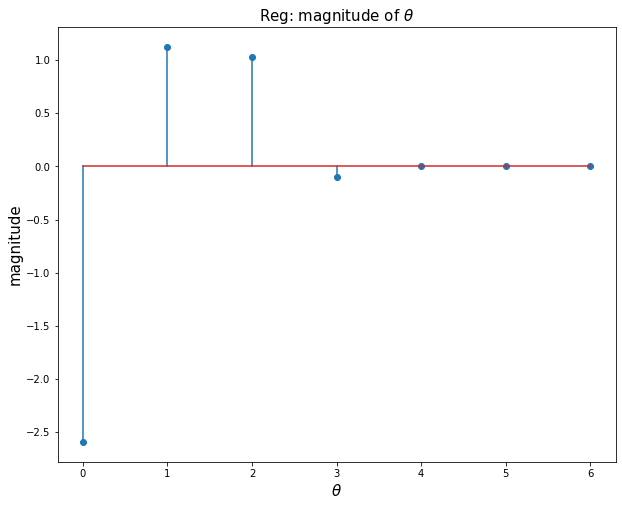

In [105]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(input_data, output_data)

reg_coef = np.vstack([reg.intercept_.reshape([-1, 1]), reg.coef_.reshape([-1, 1])]) 

plt.figure(figsize = (10, 8))
plt.title(r'Reg: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(reg_coef)
plt.show()

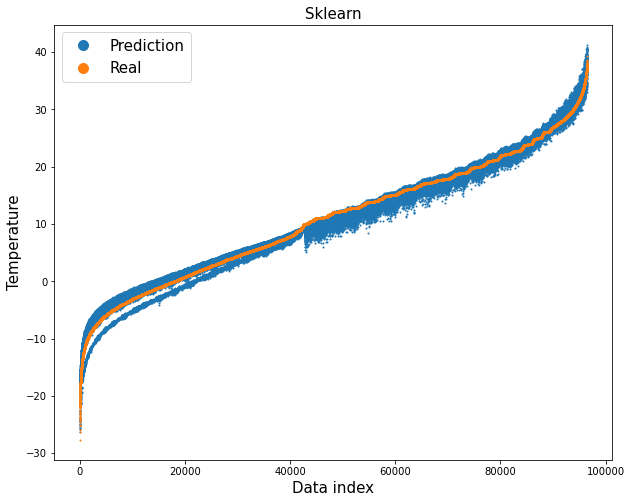

In [66]:
plt.figure(figsize = (10, 8))
plt.title('Sklearn', fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(reg.predict(input_data), 'o', markersize = 1, label = 'Prediction')
plt.plot(output_data, 'o', markersize = 1, label = 'Real')
plt.legend(fontsize = 15, markerscale=10)
plt.show()

<ipython-input-106-8abab9580d65>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ridge_coef)


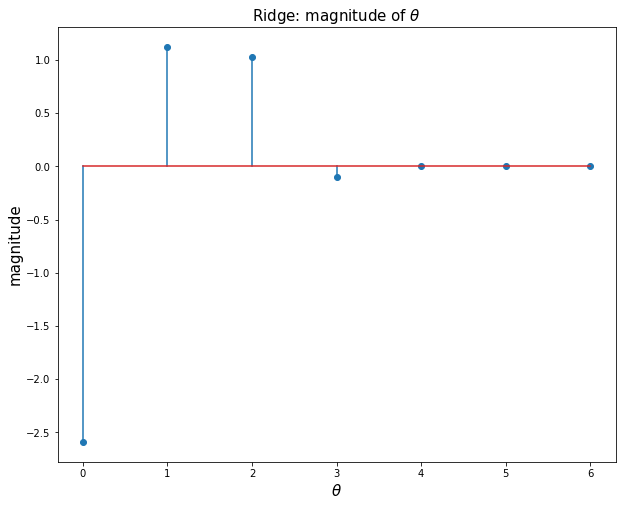

In [106]:
ridge = linear_model.Ridge()
ridge.fit(input_data, output_data)

ridge_coef = np.vstack([ridge.intercept_.reshape([-1, 1]), ridge.coef_.reshape([-1, 1])]) 

plt.figure(figsize = (10, 8))
plt.title(r'Ridge: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(ridge_coef)
plt.show()

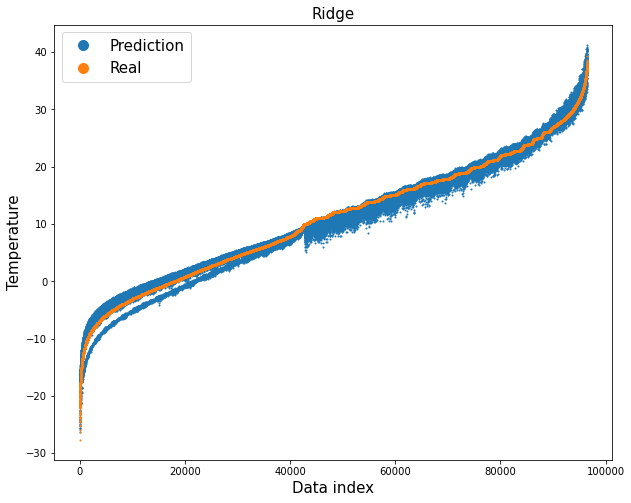

In [68]:
plt.figure(figsize = (10, 8))
plt.title('Ridge', fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(ridge.predict(input_data), 'o', markersize = 1, label = 'Prediction')
plt.plot(output_data, 'o', markersize = 1, label = 'Real')
plt.legend(fontsize = 15, markerscale=10)
plt.show()

<ipython-input-107-9df9936b31e8>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lasso_coef)


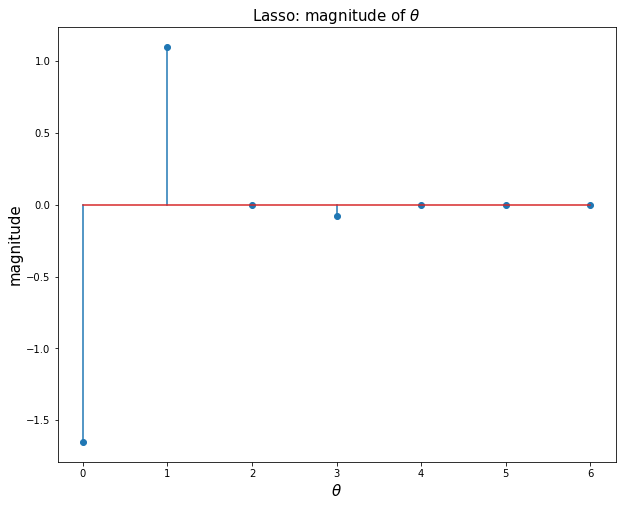

In [107]:
lasso = linear_model.Lasso()
lasso.fit(input_data, output_data)

lasso_coef = np.vstack([lasso.intercept_.reshape([-1, 1]), lasso.coef_.reshape([-1, 1])]) 

plt.figure(figsize = (10, 8))
plt.title(r'Lasso: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(lasso_coef)
plt.show()

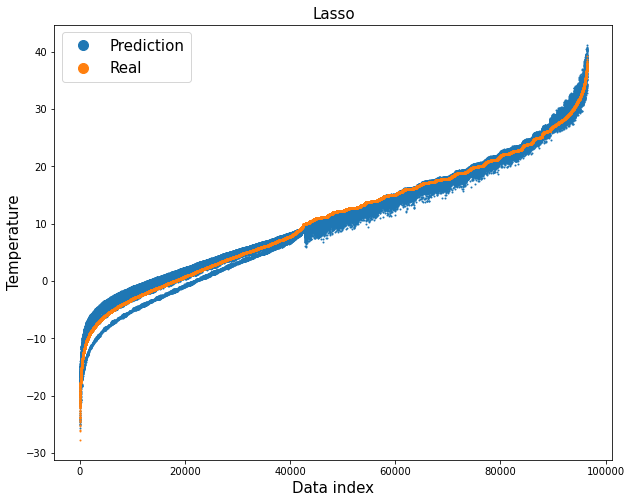

In [71]:
plt.figure(figsize = (10, 8))
plt.title('Lasso', fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(lasso.predict(input_data), 'o', markersize = 1, label = 'Prediction')
plt.plot(output_data, 'o', markersize = 1, label = 'Real')
plt.legend(fontsize = 15, markerscale=10)
plt.show()

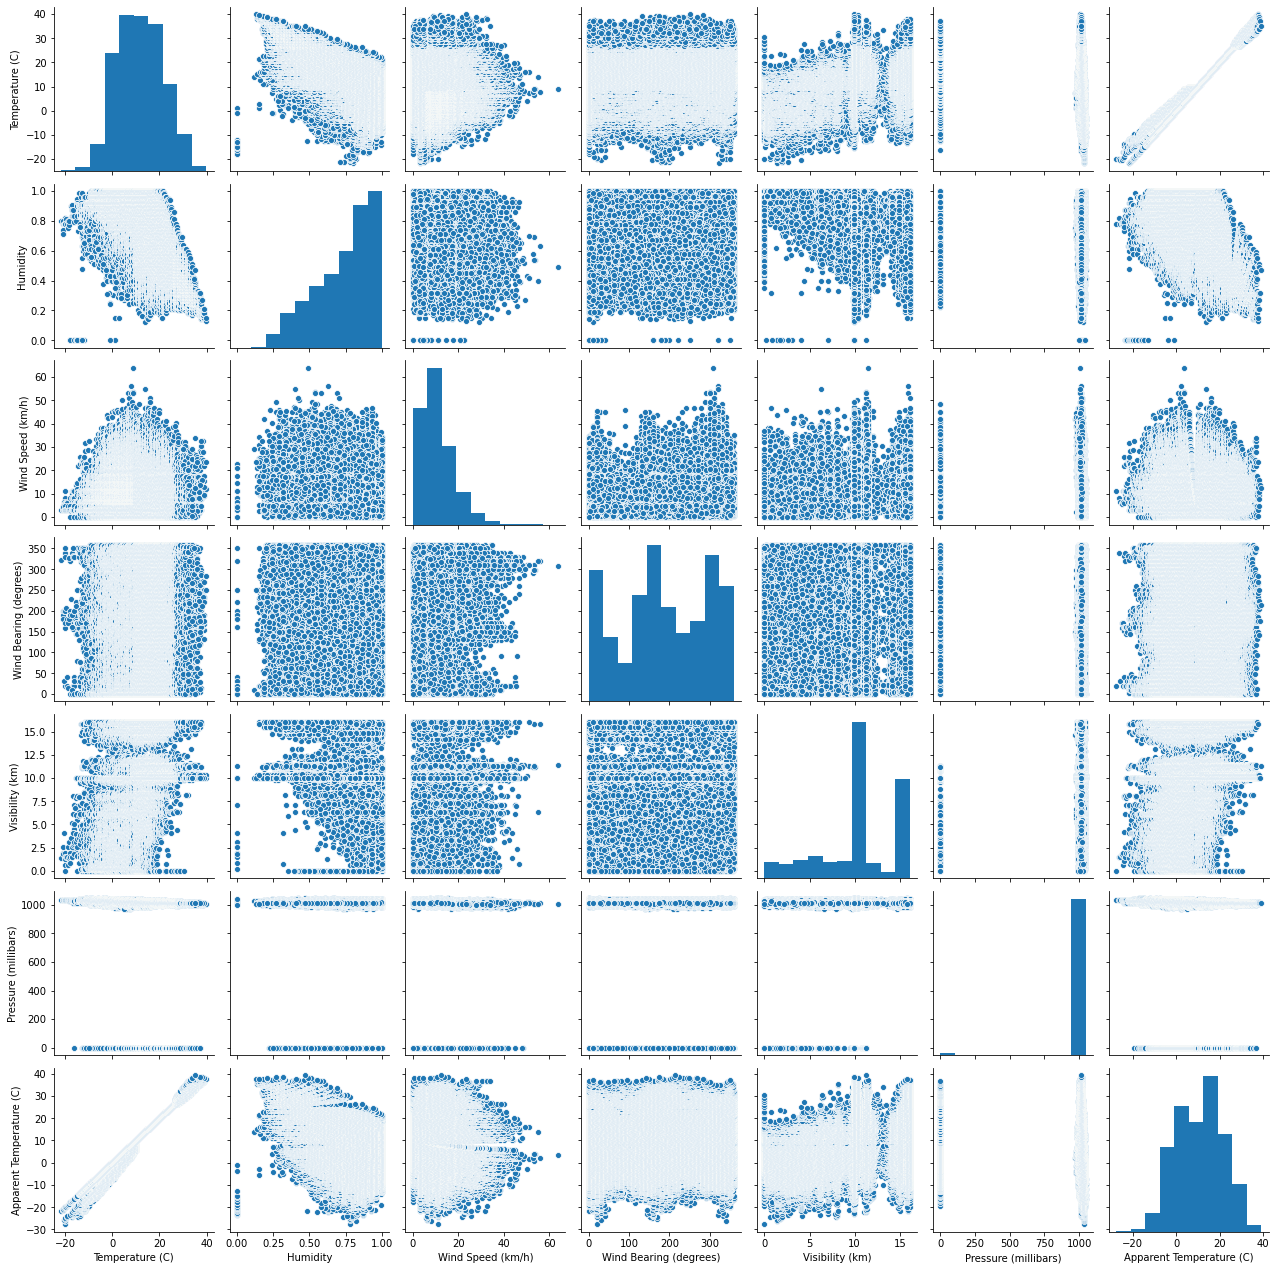

In [109]:
sns.pairplot(weather_data)

In [110]:
correlation_matrix = weather_data.corr()
correlation_matrix

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.992629
Humidity,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.602571
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263,-0.056650
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651,0.029031
Visibility (km),0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818,0.381718
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.000219
Apparent Temperature (C),0.992629,-0.602571,-0.056650,0.029031,0.381718,-0.000219,1.000000


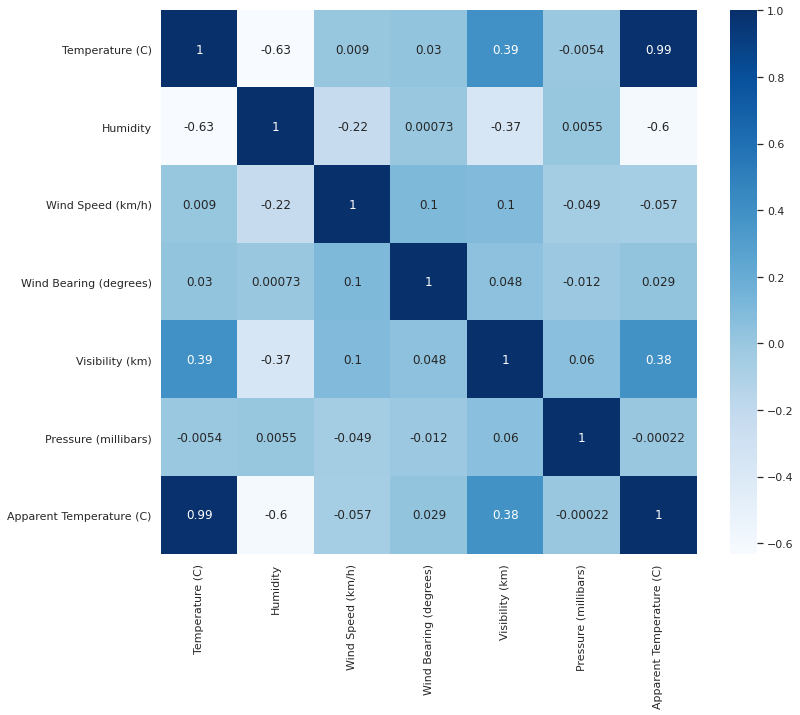

In [124]:
sns.set(rc = {'figure.figsize': (12, 10)})
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')